In [3]:
from keras.utils import set_random_seed
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
# 사용하지 않는 메모리 지우기

import gc

gc.collect()

0

In [13]:
set_random_seed(11)

In [14]:
def grayImg(dir):
        
    file_path=f'./Data/{dir}/'
    x_train=[]
    y_train=[]

    img_list=os.listdir(file_path)

    for i in img_list:
        img = plt.imread(file_path+i)
        R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
        img=resize(img, (150, 150))
        y_train.append(np.array(img))
        
        # imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        imgGray = 0.3333 * R + 0.3334 * G + 0.3333 * B
        imgGray=resize(imgGray, (150, 150))
        x_train.append(np.array(imgGray))
        
    return x_train, y_train

In [6]:
all_data=os.listdir('./Data/')
x=[]
y=[]
for i in all_data:
    data=grayImg(i)
    x.append(np.array(data[0]))
    y.append(np.array(data[1]))

In [ ]:
x_train=x[0]
y_train=y[0]
for i in range(1,4):
    x_train=np.vstack([x_train,x[i]])
    y_train=np.vstack([y_train,y[i]])

x_train.shape, y_train.shape

In [ ]:
# 흑백사진 컬러사진 형식으로 변환
x_train=np.stack([x_train,x_train,x_train], axis=3)
x_train.shape

(9461, 150, 150, 3)

In [9]:
x_train[0,:,:,0].shape

(150, 150)

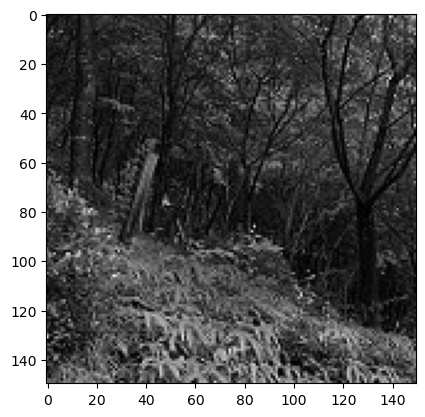

In [10]:
plt.imshow(x_train[0,:,:,0], cmap='gray')
plt.show()

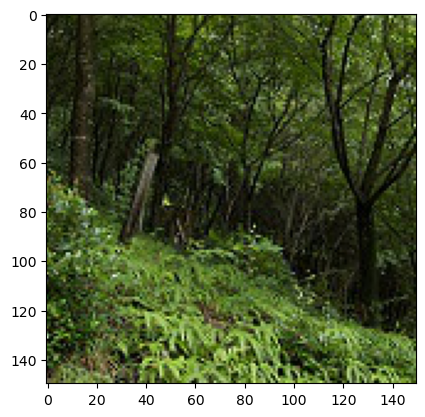

In [11]:
plt.imshow(y_train[0])
plt.show()

In [12]:
# 스케일링
x_train=x_train/255.0/3.0

In [13]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=11)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=11)

In [14]:
x_train.shape, x_val.shape, x_test.shape

((5321, 150, 150, 3), (1774, 150, 150, 3), (2366, 150, 150, 3))

In [15]:
def createModel(n_node):
    
    model=Sequential()
    
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(150,150,3)))
    
    
    model.add(Conv2D(50, kernel_size=3, padding='same'))
    
    
    # 출력
    model.add(Conv2D(3,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model


In [16]:
model=createModel(50)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 50)      1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 50)      22550     
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 3)       1353      
                                                                 
Total params: 25,303
Trainable params: 25,303
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
167/167 [==============================] - 332s 2s/step - loss: 0.0173 - val_loss: 0.0077
Epoch 2/10
167/167 [==============================] - 314s 2s/step - loss: 0.0076 - val_loss: 0.0072
Epoch 3/10
167/167 [==============================] - 303s 2s/step - loss: 0.0075 - val_loss: 0.0070
Epoch 4/10
167/167 [==============================] - 305s 2s/step - loss: 0.0074 - val_loss: 0.0070
Epoch 5/10
167/167 [==============================] - 304s 2s/step - loss: 0.0074 - val_loss: 0.0070
Epoch 6/10
167/167 [==============================] - 313s 2s/step - loss: 0.0073 - val_loss: 0.0069
Epoch 7/10
167/167 [==============================] - 324s 2s/step - loss: 0.0073 - val_loss: 0.0070
Epoch 8/10
167/167 [==============================] - 338s 2s/step - loss: 0.0073 - val_loss: 0.0069
Epoch 9/10
167/167 [==============================] - 362s 2s/step - loss: 0.0073 - val_loss: 0.0069
Epoch 10/10
167/167 [==============================] - 352s 2s/step - loss: 0.0073 - val_lo

In [1]:
def test_plt(i):
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.imshow(x_test[i].reshape(150,150,3))
    plt.xticks([], [])
    plt.yticks([], [])

    plt.subplot(132)
    pre_out=model.predict(x_test[i].reshape(-1,150,150,3))
    plt.imshow(pre_out.reshape(150,150,3))
    plt.xticks([], [])
    plt.yticks([], [])

    plt.subplot(133)
    plt.imshow(y_test[i])
    plt.xticks([], [])
    plt.yticks([], [])
    
    plt.tight_layout()
    plt.show()

In [2]:
test_plt(100)

NameError: name 'plt' is not defined

In [48]:
from keras.models import save_model
save_model(model, 'model10.h5')

1/1 [==============================] - 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


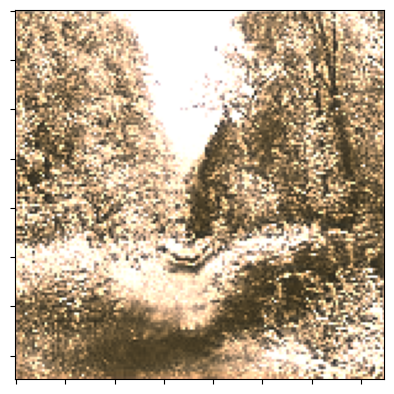

In [144]:


pre_out=model.predict(x_test[100].reshape(-1,150,150,3))
plt.imshow(pre_out.reshape(150,150,3)*[2.4,1.7,1.4])
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.show()


In [58]:
w=np.arange(0.5,3.1,0.1)

In [59]:
w

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ])

In [ ]:
for i in w:
    pre_out=model.predict(x_test[650].reshape(-1,150,150,3))
    plt.imshow(pre_out.reshape(150,150,3)*i)
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    plt.show()
    print(i)

In [81]:
pre_out=model.predict(x_test[650].reshape(-1,150,150,3))
pre_out.reshape(150,150,3)*[100,200,300][0]

1/1 [==============================] - 0s 40ms/step


array([[[26.439068 , 33.067287 , 33.94121  ],
        [69.097984 , 73.845985 , 74.66964  ],
        [51.599808 , 57.538406 , 57.83521  ],
        ...,
        [22.0412   , 27.398087 , 26.718271 ],
        [41.79782  , 47.713955 , 46.269047 ],
        [20.294378 , 24.316917 , 23.316877 ]],

       [[18.87749  , 23.716227 , 26.202751 ],
        [57.37933  , 63.814808 , 65.13315  ],
        [35.95544  , 43.708553 , 45.883785 ],
        ...,
        [20.403906 , 25.515015 , 22.85544  ],
        [ 9.803076 , 13.2251215, 12.757431 ],
        [23.308723 , 28.510397 , 27.620548 ]],

       [[21.02985  , 25.650946 , 26.222176 ],
        [41.74987  , 46.936478 , 44.839676 ],
        [49.789803 , 54.67118  , 50.580334 ],
        ...,
        [18.696077 , 22.020725 , 17.6168   ],
        [14.035693 , 17.03604  , 14.672799 ],
        [17.8268   , 20.457222 , 18.943794 ]],

       ...,

       [[15.967284 , 17.502922 , 14.654801 ],
        [18.189407 , 20.788118 , 16.55459  ],
        [10.795526 , 1

In [79]:
pre_out.reshape(150,150,3)

array([[[0.26439068, 0.33067286, 0.33941212],
        [0.69097984, 0.7384598 , 0.7466964 ],
        [0.51599807, 0.5753841 , 0.5783521 ],
        ...,
        [0.220412  , 0.27398086, 0.2671827 ],
        [0.4179782 , 0.47713953, 0.46269047],
        [0.20294379, 0.24316917, 0.23316878]],

       [[0.18877488, 0.23716226, 0.2620275 ],
        [0.5737933 , 0.63814807, 0.6513315 ],
        [0.3595544 , 0.43708554, 0.45883784],
        ...,
        [0.20403905, 0.25515014, 0.2285544 ],
        [0.09803076, 0.13225122, 0.12757431],
        [0.23308723, 0.28510398, 0.27620548]],

       [[0.21029851, 0.25650945, 0.26222175],
        [0.4174987 , 0.46936476, 0.44839677],
        [0.49789804, 0.5467118 , 0.50580335],
        ...,
        [0.18696077, 0.22020726, 0.176168  ],
        [0.14035693, 0.1703604 , 0.146728  ],
        [0.178268  , 0.20457222, 0.18943794]],

       ...,

       [[0.15967284, 0.17502922, 0.14654802],
        [0.18189406, 0.20788118, 0.1655459 ],
        [0.10795525, 0

In [72]:
a=np.array([[[1,2,3],
         [10,20,30],
         [100,200,300]]])

In [73]:
a.shape

(1, 3, 3)

In [75]:
a[0][0]

array([1, 2, 3])